In [70]:
import numpy as np 
import pandas as pd 

# Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # WordCloud generator



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df = pd.read_csv("C:\\Users\\Srinivas\\Documents\\amazon.csv")

In [71]:
print(df.head())

   product_id  ...                                       product_link
0  B07JW9H4J1  ...  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1  B098NS6PVG  ...  https://www.amazon.in/Ambrane-Unbreakable-Char...
2  B096MSW6CT  ...  https://www.amazon.in/Sounce-iPhone-Charging-C...
3  B08HDJ86NZ  ...  https://www.amazon.in/Deuce-300-Resistant-Tang...
4  B08CF3B7N1  ...  https://www.amazon.in/Portronics-Konnect-POR-1...

[5 rows x 16 columns]


In [72]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [73]:
# Ensure all values are strings before applying string methods
df['discounted_price'] = df['discounted_price'].astype(str)
df['actual_price'] = df['actual_price'].astype(str)
df['discount_percentage'] = df['discount_percentage'].astype(str)

# Remove currency symbols and commas
df['discounted_price'] = df['discounted_price'].str.replace("₹", '', regex=False)
df['discounted_price'] = df['discounted_price'].str.replace(",", '', regex=False)
df['actual_price'] = df['actual_price'].str.replace("₹", '', regex=False)
df['actual_price'] = df['actual_price'].str.replace(",", '', regex=False)

# Convert to float
df['discounted_price'] = df['discounted_price'].astype('float64')
df['actual_price'] = df['actual_price'].astype('float64')

# Handle percentages
df['discount_percentage'] = df['discount_percentage'].str.replace("%", '', regex=False)
df['discount_percentage'] = df['discount_percentage'].str.replace(",", '', regex=False)
df['discount_percentage'] = df['discount_percentage'].astype('float64') / 100


Rating Column

In [74]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [75]:
#In rating column I encountered the string type while changing it from the string to float 
# as from the unique() result I can See the rating having the '|' so get into the amazon.in and checked it and it was 3.9
#so lets update that product rating
df.loc[df.product_id=='B08L12N5H1',"rating"]="3.9"

In [76]:
#lets change the ratinf columns to float
df['rating']=df['rating'].astype('float64')

Missing Values

In [77]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [78]:
#so I can see 2 null values in rating_count column
#so I will try to fill the null values using the median value of the columns
df[df.rating_count.isnull()]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


Exploratory Data Analysis-EDA

In [79]:
df['rating_count'] = df['rating_count'].astype(str)
df['rating_count'] = df['rating_count'].str.replace(",", '', regex=False)
df['rating_count'] = df['rating_count'].astype('float64')
median_value = round(df['rating_count'].median(), 1)
# Fill NaN values with the rounded median
df['rating_count'].fillna(value=median_value, inplace=True)

Price Distribution

In [80]:
#Actual Price
fig=px.histogram(df.actual_price,x="actual_price",nbins=20,title="Price Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [81]:
below_5000=len(df[df['actual_price']<=5000])
df_len=len(df)

print("%.2f%% of the products are sold below 5000 indian rupees(%.2f USD)"
    %(100*below_5000/df_len, 5000*0.012))

78.09% of the products are sold below 5000 indian rupees(60.00 USD)


In [82]:
low_price=df[df['actual_price']<=5000]
fig=px.histogram(low_price,x="actual_price",title="Below 5000INR price distribution",color_discrete_sequence=["#232F3F"])
fig.update_layout(bargap=0.1)
fig.show()

In [83]:
low_price=df[df['actual_price']>=5000]
fig=px.histogram(low_price,x="actual_price",title="Above 5000INR price distribution",color_discrete_sequence=["#242F3F"])
fig.update_layout(bargap=0.1)
fig.show()

In [84]:
#lets find the expensive product 
df[df['actual_price']==df['actual_price'].max()]
#and it is Smart Tv

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,0.44,4.7,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...


In [85]:
# Get the 5 products with the expensive actual_price
min_price_products = df.nlargest(5, 'actual_price')
# Display specific columns of the 5 products with the maximum actual_price
print(min_price_products[['product_name', 'actual_price', 'discounted_price', 'discount_percentage']])

                                           product_name  ...  discount_percentage
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...  ...                 0.44
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...  ...                 0.35
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...  ...                 0.40
1354  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...  ...                 0.43
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...  ...                 0.49

[5 rows x 4 columns]


In [86]:
#lets find the leat expensive product
df[df['actual_price']==df['actual_price'].min()]
#both product are Flexible USB LED Light

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
975,B08TDJ5BVF,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.0,39.0,0.0,3.8,3344.0,The side the LED light falls on will depend on...,"AEEH5DFNKICJXQME6UXNS3P3OM3A,AGBSAL7DSIA2DOH4O...","Yugandhar Menda,Sonia,Amazon Customer,Placehol...","R3163MRJDEJMN7,RSQGCR6V7H766,R39PS8UO1CZS2D,R2...","Lighting,TINY & USEFUL.,Fair product,Worth for...","Recieved a wrong color.. But ok..,Simple and Q...",https://m.media-amazon.com/images/I/31s6OZfTO2...,https://www.amazon.in/COSMOS-Portable-Flexible...
997,B00URH5E34,Inventis 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.0,39.0,0.0,3.6,13572.0,The side the LED light falls on will depend on...,"AGA4V2SLJ744MITK2FWWGPXOFB7A,AHDOHVS266NLKERWU...","Dhruv Sharma,Durairaj B,Ved Katyayan,Shailendr...","R1NAJ7CT76Z9SF,R17L9205IYOD,R2GAKH6NBQPCFV,R12...","it worked properly for almost one year,ok,USB ...","very good product, very bright, easy to use, i...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Inventis-Portable-Flexib...


In [87]:
# Get the 5 products with the minimum actual_price
min_price_products = df.nsmallest(5, 'actual_price')
# Display specific columns of the 5 products with the minimum actual_price
print(min_price_products[['product_name', 'actual_price', 'discounted_price', 'discount_percentage']])


                                          product_name  ...  discount_percentage
975  E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...  ...                 0.00
997  Inventis 5V 1.2W Portable Flexible USB LED Lig...  ...                 0.00
616  Classmate Octane Neon- Blue Gel Pens(Pack of 5...  ...                 0.00
710  E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...  ...                 0.00
811  Classmate Pulse Spiral Notebook - 240 mm x 180...  ...                 0.11

[5 rows x 4 columns]


In [88]:
df['actual_price'].describe()

count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64

Discounted Price

In [89]:
fig=px.histogram(df.discounted_price,x="discounted_price",title="Distributed Price Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [90]:
#most discounted prices are below 3500
below_3500=df[df['discounted_price']<=3500]
fig=px.histogram(below_3500.discounted_price,x="discounted_price",title="Discounted Price Below 3500 Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

Overlayed Prices


In [91]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df.actual_price, name="Actual Price", marker_color="#232F3E"))
fig.add_trace(go.Histogram(x=df.discounted_price, name="Discounted Price", marker_color="#FF9900"))

# Overlay both histograms
fig.update_layout(barmode='overlay', title="Actual Price x Discounted Price", xaxis_title="Price", yaxis_title="Number of Products")
# Reduce opacity to see both histograms
fig.update_traces(
    opacity=0.75, 
    xbins=dict( 
        start=0.0,
        end=20000.0),
    hovertemplate="Price Range: %{x} | Count: %{y}"
        )
fig.show()

Discount Percentage

In [92]:
fig=px.histogram(df.discount_percentage,x="discount_percentage",title="Discount Percentage Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

Most applied discount percentages are between 40-70%

Rating

In [93]:
fig=px.histogram(df.rating,x="rating",title="Rating Distribution",color_discrete_sequence=["#232F3E"])
fig.update_layout(bargap=0.1)
fig.show()

In [94]:
#lets find the avg rate percenatge 
avg_rate_percentage = df[df['rating'].between(3.8, 4.5)].count().rating / df.count().rating
print("%.2f%% of the values are rated between 3.8 and 4.5" %(avg_rate_percentage*100))

88.12% of the values are rated between 3.8 and 4.5


Price X Rating


In [95]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.actual_price,y=df.rating,mode="markers",name="Actual Price",marker_color="#232F3E"))
fig.add_trace(go.Scatter(x=df.discounted_price,y=df.rating,mode="markers",name="Discounted Price",marker_color="#FF9900"))
fig.update_layout(title="Avctual and Discounted X Rating",xaxis_title="Price",yaxis_title="Rating")
fig.show()

Products priced above 20k INR are all rated above 3.7

Categories

In [96]:
categories=df['category'].copy()
for i in range(len(categories)):
    categories[i]=categories[i].split('|')

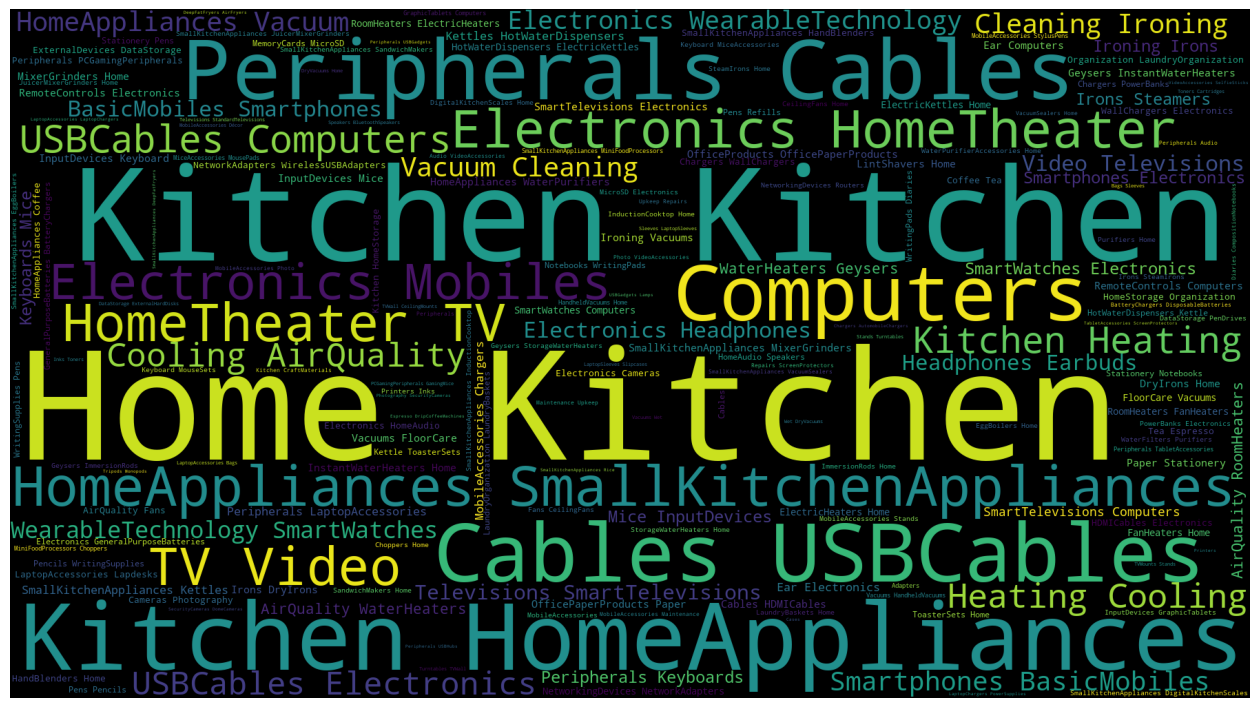

In [97]:
summary=df['category'].copy()
all_summary=" ".join(s for s in summary)
stopwords=set(STOPWORDS)
stopwords.update(["Accessories","&"])
wordcloud=WordCloud(stopwords=stopwords,
background_color="black",
width=1800,height=1000).generate(all_summary)

fig2,ax=plt.subplots(figsize=(16,9))
ax.imshow(wordcloud,interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

As shown in the WordCloud, the Kitchen products, such as Electronics/Computers and their Accessories such as cables are the most famous products in this Dataset

Rating Count

In [98]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.rating_count, y=df.rating, mode="markers", name="Actual Price", marker_color="#232F3E"))
fig.update_layout(title="Rating Count x Rating", xaxis_title="Rating Count", yaxis_title="Rating")
fig.show()

Feature Engineering

In [99]:
df['price_difference'] = df['actual_price'] - df['discounted_price']
df['price_discount_ratio'] = (df['actual_price'] - df['discounted_price']) / df['actual_price']
df['avg_rating'] = df['rating'] / df['rating_count']
df['product_name_length'] = df['product_name'].str.len()
df['about_product_length'] = df['about_product'].str.len()
df['review_title_length'] = df['review_title'].str.len()
df['review_content_length'] = df['review_content'].str.len()
df['product_name_word_count'] = df['product_name'].str.split().str.len()
df['about_product_word_count'] = df['about_product'].str.split().str.len()
df['review_title_word_count'] = df['review_title'].str.split().str.len()
df['review_content_word_count'] = df['review_content'].str.split().str.len()

In [100]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["discount_percentage"], y=df["actual_price"], mode="markers"))
fig.update_layout(title="Relationship between Discount Percentage and Actual Price")
fig.show()

In [101]:
df["review_length"] = df["review_content"].str.len()
fig = px.histogram(df, x="review_length", title="Distribution of Review Lengths")
fig.show()

In [102]:
category_counts = df["category"].value_counts().head(10)
category_labels = category_counts.index.map(lambda x: x[:20] + "..." if len(x) > 20 else x)

fig = px.bar(category_counts, x=category_labels, y=category_counts.values, title="Top 10 Most Common Product Categories")
fig.update_layout(
    xaxis_tickangle=-45,  
    title_x=0.5 
)
fig.show()

In [103]:
fig = px.scatter(df, x="actual_price", y="rating_count", title="Rating Count vs Actual Price")
fig.show()

In [104]:
fig = px.scatter(df, x="actual_price", y="discount_percentage", title="Discount Percentage vs Actual Price")
fig.show()

In [105]:
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords

# Extract review content and create a single string
review_text = ' '.join(df['review_content'])

# Create a word cloud
stopwords_set = set(stopwords.words('english'))
wc = WordCloud(stopwords=stopwords_set, background_color="white", max_words=100, width=800, height=400).generate(review_text)

# Display the word cloud
fig = px.imshow(wc, title="Word Cloud of Product Reviews")
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Extract product names and create a single string
product_names = ' '.join(df['product_name'])

# Create a word cloud
stopwords_set = set(stopwords.words('english'))
wc = WordCloud(stopwords=stopwords_set, background_color="white", max_words=100, width=800, height=400).generate(product_names)

# Display the word cloud
fig = px.imshow(wc, title="Word Cloud of Product Names")
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
from textblob import TextBlob

# Perform sentiment analysis on review content
df['review_sentiment'] = df['review_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a scatter plot of review sentiment vs rating
fig = px.scatter(df, x="review_sentiment", y="rating", title="Review Sentiment vs Rating")
fig.show()

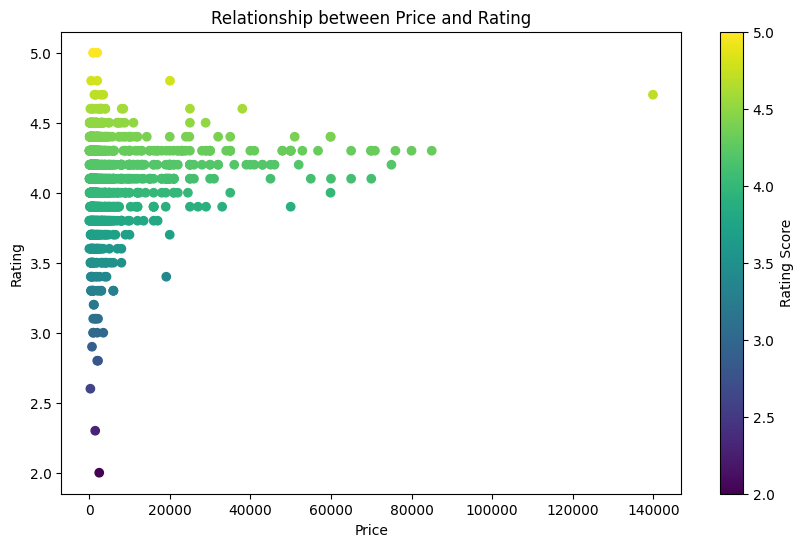

In [108]:
import matplotlib.pyplot as plt

# Scatter plot of price and rating
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['rating'], c=df['rating'], cmap='viridis')
plt.colorbar(label='Rating Score')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship between Price and Rating')
plt.show()

Conclusion:
In this Amazon sale analysis, we transformed and analyzed key aspects of product pricing, discounts, and rating counts. We found that most products are priced within a moderate range with significant discounts, indicating aggressive pricing strategies. By identifying the top 5 cheapest products, we provided insights into budget-friendly options. Recommendations include enhancing marketing for high-discount items, focusing on popular categories, and monitoring competitor pricing. This analysis provides valuable insights to optimize pricing strategies and improve customer engagement. Future work could include analyzing customer reviews and using predictive models for deeper market insights.